In [24]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding
from keras.utils import to_categorical
from keras.preprocessing import sequence
from keras.datasets import reuters
from keras.utils import pad_sequences
from keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt


In [2]:
#데이터를 불러와 학습셋,데이터셋으로 나눕니다.
(X_train,y_train),(X_test,y_test) = reuters.load_data(num_words=1000,test_split=0.2)

2110848/2110848 [==============================] - 0s 0us/step


In [4]:
#데이터를 확인해 보겠습니다.
category = np.max(y_train)+1
print(category,'카테고리')
print(len(X_train),'학습용 뉴스 기사')
print(len(X_test),'테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [7]:
#단어의 수를 맞추어 줍니다.
X_train = pad_sequences(X_train,maxlen=100)
X_test = pad_sequences(X_test,maxlen=100)


In [8]:
#원-핫 인코딩 처리를 합니다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
#모델의 구조를 설정합니다.
model =Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100,activation='tanh'))
model.add(Dense(46,activation='softmax'))

In [13]:
#모델의 실행 옵션을 정합니다.
model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [14]:
#학습의 조기 중단을 설정
early_sttopping_callback = EarlyStopping(monitor='val_loss',patience=5)

In [15]:
#모델을 실행합니다.
history = model.fit(X_train,y_train,batch_size=20,epochs=200,
                    validation_data=(X_test,y_test),callbacks=[early_sttopping_callback])


Epoch 1/200
450/450 [==============================] - 10s 8ms/step - loss: 2.1666 - accuracy: 0.4544 - val_loss: 1.8536 - val_accuracy: 0.5405
Epoch 2/200
450/450 [==============================] - 3s 6ms/step - loss: 1.7841 - accuracy: 0.5461 - val_loss: 1.6701 - val_accuracy: 0.5837
Epoch 3/200
450/450 [==============================] - 3s 6ms/step - loss: 1.5852 - accuracy: 0.6005 - val_loss: 1.5188 - val_accuracy: 0.6256
Epoch 4/200
450/450 [==============================] - 3s 6ms/step - loss: 1.3738 - accuracy: 0.6541 - val_loss: 1.3820 - val_accuracy: 0.6523
Epoch 5/200
450/450 [==============================] - 3s 6ms/step - loss: 1.2388 - accuracy: 0.6853 - val_loss: 1.2931 - val_accuracy: 0.6661
Epoch 6/200
450/450 [==============================] - 3s 6ms/step - loss: 1.1334 - accuracy: 0.7168 - val_loss: 1.2474 - val_accuracy: 0.6825
Epoch 7/200
450/450 [==============================] - 3s 6ms/step - loss: 1.0383 - accuracy: 0.7354 - val_loss: 1.1480 - val_accuracy: 0.709

In [16]:
#테스트 정확도를 출력합니다.
print('\n Test Accuracy:%.4f'%(model.evaluate(X_test,y_test)[1]))

71/71 [==============================] - 0s 6ms/step - loss: 1.1940 - accuracy: 0.7266

 Test Accuracy:0.7266


In [20]:
#점증셋과 학습셋의 오차를 저장합니다.
y_vloss =history.history['val_loss']

y_loss = history.history['loss']


[1.853559136390686, 1.6700592041015625, 1.5187675952911377, 1.3820011615753174, 1.293104887008667, 1.2473794221878052, 1.1479898691177368, 1.1191593408584595, 1.1062871217727661, 1.127977967262268, 1.122884750366211, 1.1610121726989746, 1.1528593301773071, 1.1939504146575928]


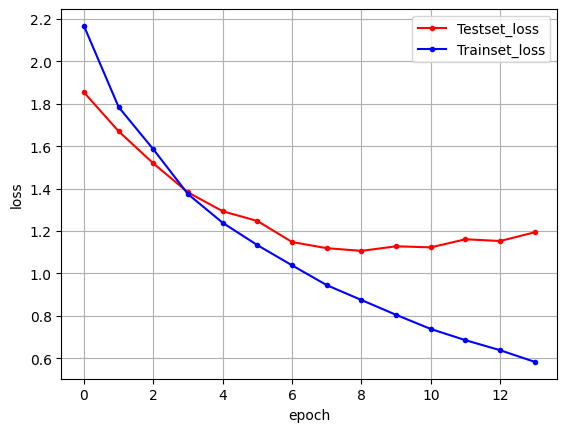

In [23]:
#그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))

plt.plot(x_len,y_vloss,marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')
#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
